In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns

In [2]:
path = "/Users/coes3/phd-labs/fraganal/data_source/ooni/"

In [3]:
def data_prep(path):
    files = Path(path).glob('*.csv')
    dfs = []

    for i in files:
        data = pd.read_csv(i, header=0)
        data['cc'] = i.name.split('_')[-1].strip('.csv')
        dfs.append(data)

    df = pd.concat(dfs, ignore_index=True)
    df.rename(columns={"measurement_start_day":"date", "confirmed_count":"blocked_count", "ok_count":"success_count"}, inplace = True)

    columns = ['failure_count', 'measurement_count', 'success_count']
    df.drop(columns, inplace=True, axis=1)

    df = df[['date', 'category_code', 'blocked_count', 'anomaly_count', 'cc']]
    
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    
    #  filter on date range
    df = df.loc[(df['date'] >= '2021-01-01') & (df['date'] <= '2023-01-01')]
    
    #  filter out 0 counts
    df = df.loc[df['blocked_count'] != 0]
    return df

In [4]:
df = data_prep(path)

In [5]:
def plot_graph(df, melt=False):
    
    if melt:
        df2 = pd.melt(df, id_vars = ['date', 'cc', 'category_code'], var_name='result_type', value_name='count')
        g = sns.FacetGrid(df2, col='cc', hue='result_type', col_wrap=3, height=4, aspect=2)
        g.map_dataframe(sns.lineplot, 'date', 'count').add_legend()
        g.set_xticklabels(rotation=45, ha='right')
    else:
        g = sns.FacetGrid(df, col='cc', hue='category_code', col_wrap=3, height=4, aspect=2)
        g.map_dataframe(sns.lineplot, 'date', 'blocked_count').add_legend()
        g.set_xticklabels(rotation=45, ha='right')

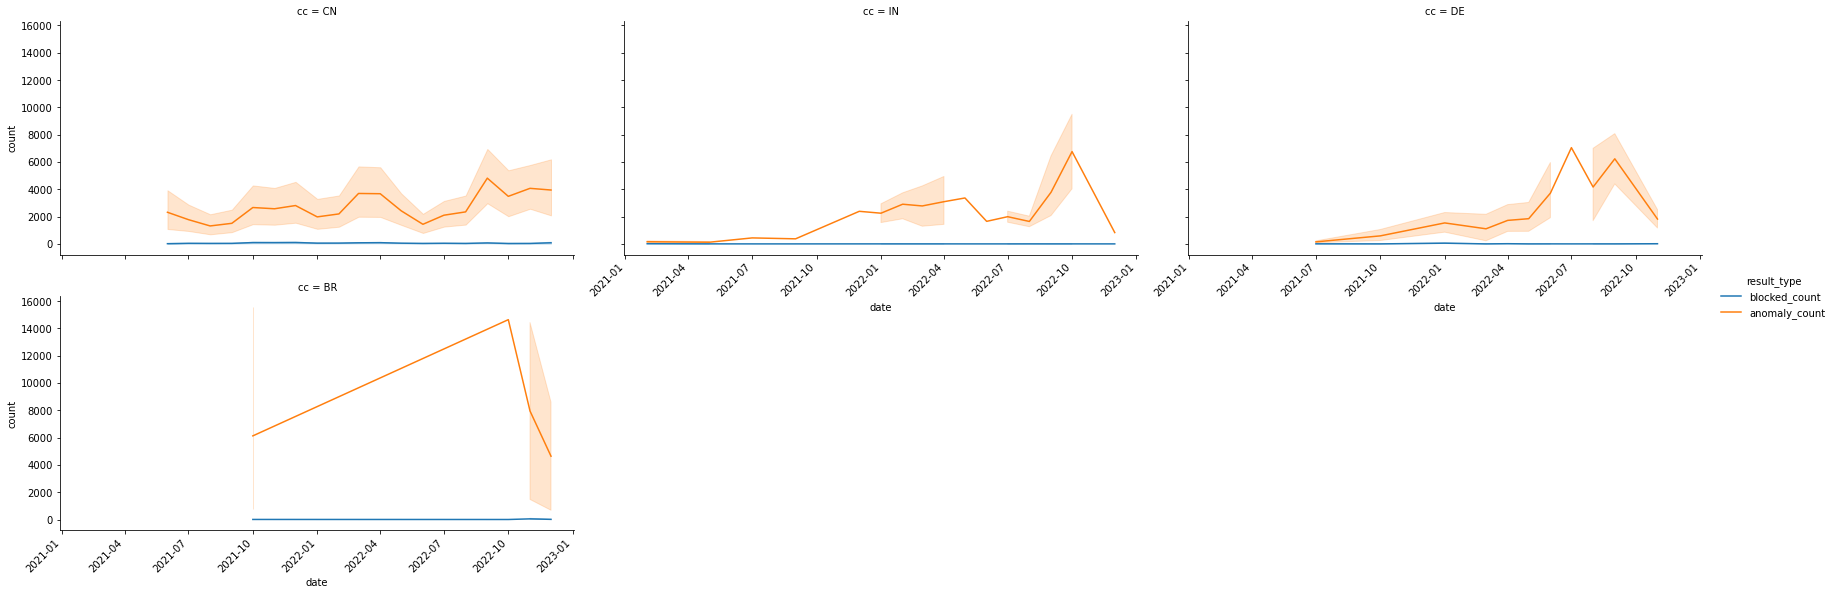

In [6]:
plot_graph(df, True)

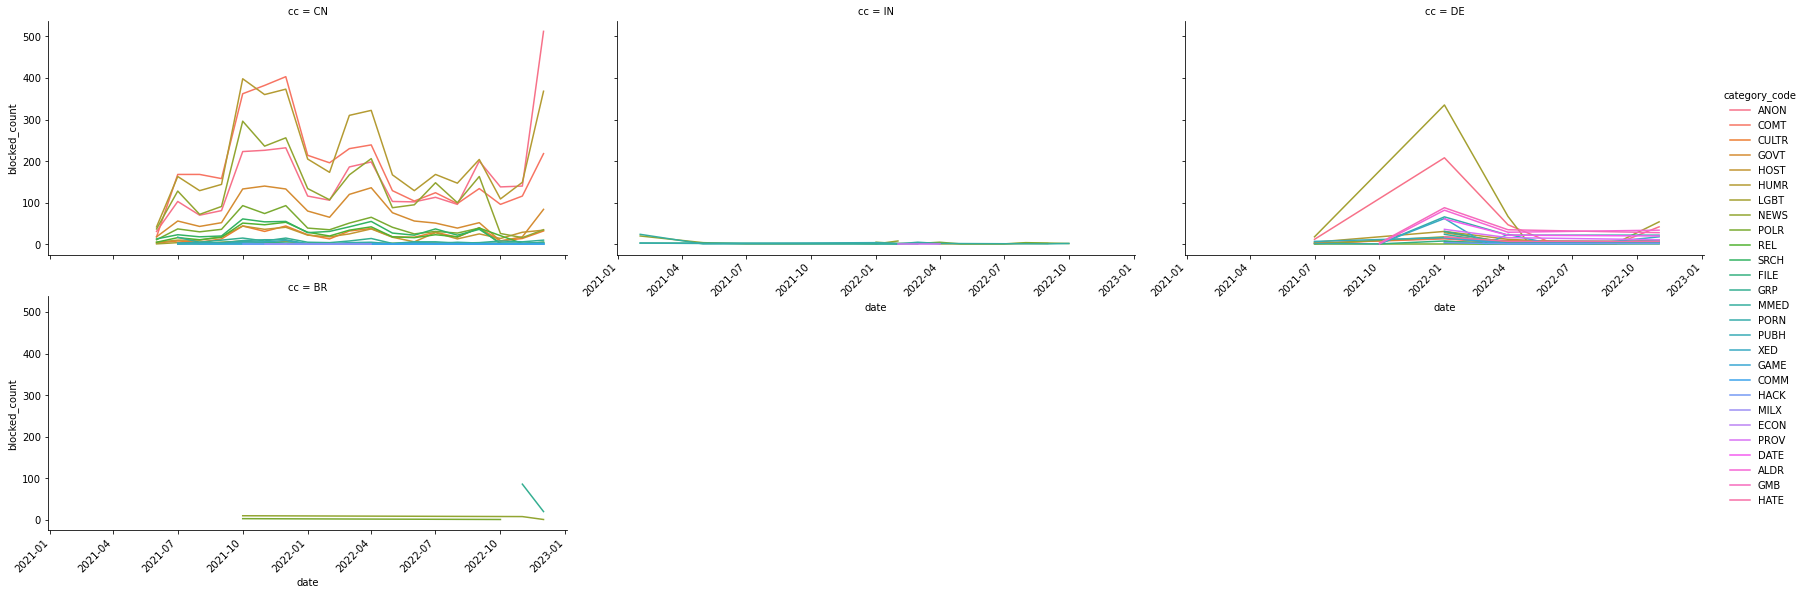

In [8]:
plot_graph(df)